## Import required libraries

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
from sklearn.manifold import TSNE

## Load MNIST data 


In [36]:
mnist_data = pd.read_csv("./data/train.csv")
mnist_data.shape

(42000, 785)

In [7]:
mnist_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### As dataframe consist of features and label value, we seperate the label and store it seperately

In [8]:
mnist_data_label = mnist_data['label']

In [9]:
mnist_data = mnist_data.drop("label", axis=1)

In [10]:
mnist_data.shape

(42000, 784)

#### We will now display/plot the a number
#### The input may either be actual RGB(A) data, or 2D scalar data.

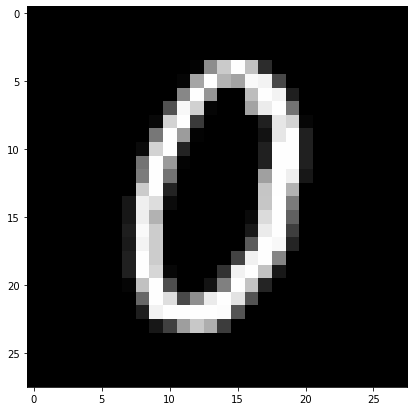

0


In [13]:
plt.figure(figsize=(7,7))
x = 5

# We have taken x as 5, which means we are taking the 5th dataset
# And reshape from 1d to 2d pixel array

grid = mnist_data.iloc[x].to_numpy().reshape(28,28)
plt.imshow(grid, interpolation = "none", cmap = "gray")
plt.show()

print(mnist_data_label[x])

## Visualising using PCA

In [15]:
# We will pick first 10k dataset

labels = mnist_data_label.head(10000)
data = mnist_data.head(10000)

print("Shape of data = ", data.shape)


Shape of data =  (10000, 784)


In [16]:
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Data-preprocessing: Standardizing the data
# Standardizing data means rescales data to mean of 0 and standard deviation of 1 
new_data = StandardScaler().fit_transform(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
# Initializing PCA
pca = decomposition.PCA()

#  Number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(new_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (10000, 2)


In [28]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T
pca_data.shape

(10000, 3)

C:\Users\6075147\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


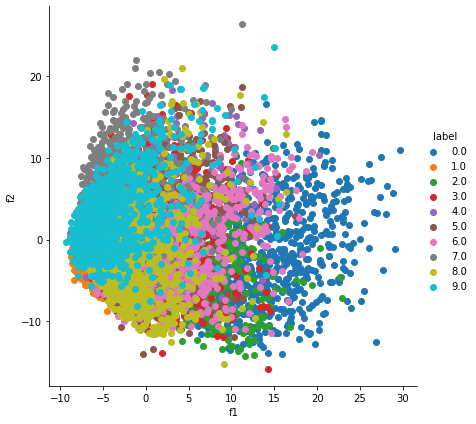

In [30]:
# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("f1", "f2", "label"))

sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, 'f1', 'f2').add_legend()
plt.show()

## Visualising using t-SNE

C:\Users\6075147\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


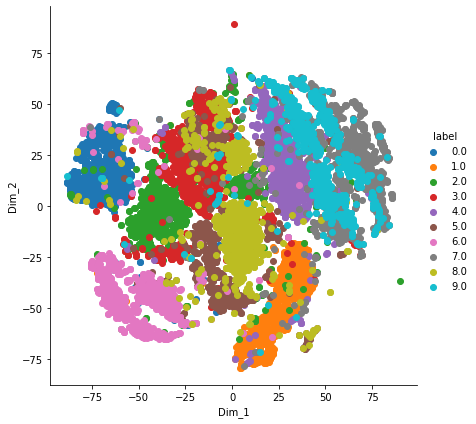

In [35]:
model = TSNE(n_components=2, random_state=0)

# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
tsne_data = model.fit_transform(new_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [41]:
from sklearn.model_selection import  train_test_split
train_data, test_data, train_label, test_label = train_test_split(mnist_data, mnist_data_label, train_size  = 0.80, random_state = 42)

train_data.shape, test_data.shape, train_label.shape,test_label.shape

((33600, 785), (8400, 785), (33600,), (8400,))

## Linear SVM

In [42]:

from sklearn import metrics
from sklearn import svm 
svm_model = svm.SVC(kernel = 'linear')
svm_model.fit(train_data,train_label)

SVC(kernel='linear')

In [43]:
# predict the X_test with the Linear Model ans also show the confusion_matrix
test_pred = svm_model.predict(test_data)
metrics.confusion_matrix(test_label, test_pred)

array([[793,   0,   4,   4,   2,   8,   5,   0,   0,   0],
       [  1, 898,   1,   4,   1,   2,   0,   2,   0,   0],
       [  7,  17, 772,  19,  10,   7,   4,   8,   2,   0],
       [  5,   4,  38, 836,   2,  37,   1,   9,   4,   1],
       [  3,   3,   7,   3, 806,   2,   6,   9,   0,   0],
       [  6,   3,   6,  47,   5, 615,  13,   1,   5,   1],
       [ 10,   2,   7,   0,   4,   8, 752,   0,   2,   0],
       [  1,   4,  13,   2,  13,   1,   0, 854,   3,   2],
       [  5,  13,  14,  14,   4,  30,   7,   5, 736,   7],
       [  4,   3,   8,   4,  20,   7,   0,   3,  11, 778]], dtype=int64)

In [52]:
#Measure the accuracyS
svm_score = metrics.accuracy_score(test_label, test_pred)
svm_score

0.9333333333333333

In [49]:
# class-wise accuracy
class_wise = metrics.classification_report(test_label, test_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       816
           1       0.95      0.99      0.97       909
           2       0.89      0.91      0.90       846
           3       0.90      0.89      0.89       937
           4       0.93      0.96      0.94       839
           5       0.86      0.88      0.87       702
           6       0.95      0.96      0.96       785
           7       0.96      0.96      0.96       893
           8       0.96      0.88      0.92       835
           9       0.99      0.93      0.96       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



## NaiveBayes

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(train_data,train_label)
gnb_pred = gnb.predict(test_data)
metrics.confusion_matrix(test_label, gnb_pred)

array([[813,   0,   3,   0,   0,   0,   0,   0,   0,   0],
       [  5, 898,   5,   0,   0,   0,   0,   0,   1,   0],
       [  0,   1, 840,   1,   3,   0,   1,   0,   0,   0],
       [  0,   0,   1, 933,   0,   2,   0,   1,   0,   0],
       [  0,   0,   1,   2, 833,   2,   1,   0,   0,   0],
       [  1,   0,   1,   0,   0, 697,   2,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0, 785,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   1, 889,   1,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0, 834,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0, 837]], dtype=int64)

In [51]:
#Measure the accuracy
nb_score = metrics.accuracy_score(test_label, gnb_pred)
nb_score

0.9951190476190476

In [50]:
# class-wise accuracy
class_wise = metrics.classification_report(test_label, gnb_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       816
           1       1.00      0.99      0.99       909
           2       0.99      0.99      0.99       846
           3       1.00      1.00      1.00       937
           4       1.00      0.99      0.99       839
           5       0.99      0.99      0.99       702
           6       0.99      1.00      1.00       785
           7       1.00      1.00      1.00       893
           8       1.00      1.00      1.00       835
           9       1.00      1.00      1.00       838

    accuracy                           1.00      8400
   macro avg       1.00      1.00      1.00      8400
weighted avg       1.00      1.00      1.00      8400



## CNN - Convolutional neural networks

In [54]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

In [55]:
# building the input vector from the 28x28 pixels
train_data = train_data.values.reshape(train_data.shape[0], 28, 28, 1)
test_data = test_data.values.reshape(test_data.shape[0], 28, 28, 1)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')


ValueError: cannot reshape array of size 26376000 into shape (33600,28,28,1)

In [ ]:

# normalizing the data to help with the training
train_data /= 255
test_data /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", train_label.shape)
train_label = np_utils.to_categorical(train_label, n_classes)
test_label = np_utils.to_categorical(test_label, n_classes)
print("Shape after one-hot encoding: ", test_label.shape)



In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(train_data, train_label, batch_size=128, epochs=10, validation_data=(test_data, test_label))